In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os



In [31]:
df = pd.read_csv("Dataset-1.csv", sep=',', index_col=0, parse_dates=True)
df.reset_index(inplace = True)


/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning:

Columns (62) have mixed types.Specify dtype option on import or set low_memory=False.



In [32]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38102 entries, 0 to 38101
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   index                          38102 non-null  int64  
 1   Id                             38102 non-null  object 
 2   Idade                          38102 non-null  int64  
 3   EstadoCivil                    38102 non-null  object 
 4   BillingCity                    38075 non-null  object 
 5   NivelConhecimentoAtual         34956 non-null  float64
 6   ScoreNivelConhecimento         37577 non-null  float64
 7   PerfilInvestidor               38102 non-null  int64  
 8   RendaMensal                    38102 non-null  float64
 9   ValorPatrimonio                25650 non-null  float64
 10  Pergunta1                      37577 non-null  object 
 11  Resposta11                     37577 non-null  object 
 12  Pergunta2                      37577 non-null 

In [33]:
#definindo as colunas interessantes para essa etapa da análise.
df = df.iloc[:,[1,2,3,4,5,6,7,8,9,46,47,48,49,58,61,62,63,64,65]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38102 entries, 0 to 38101
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       38102 non-null  object 
 1   Idade                    38102 non-null  int64  
 2   EstadoCivil              38102 non-null  object 
 3   BillingCity              38075 non-null  object 
 4   NivelConhecimentoAtual   34956 non-null  float64
 5   ScoreNivelConhecimento   37577 non-null  float64
 6   PerfilInvestidor         38102 non-null  int64  
 7   RendaMensal              38102 non-null  float64
 8   ValorPatrimonio          25650 non-null  float64
 9   ScoreRisco               37577 non-null  float64
 10  ScoreObjetivos           37577 non-null  float64
 11  ScoreSituacaoFinanceira  37577 non-null  float64
 12  Produto                  36483 non-null  object 
 13  FamiliaCarteira          30862 non-null  object 
 14  Rentabilidade12Meses  

In [34]:
# Porcentagem de dados faltantes por coluna
round (df.isna().mean()*100,2)


Id                          0.00
Idade                       0.00
EstadoCivil                 0.00
BillingCity                 0.07
NivelConhecimentoAtual      8.26
ScoreNivelConhecimento      1.38
PerfilInvestidor            0.00
RendaMensal                 0.00
ValorPatrimonio            32.68
ScoreRisco                  1.38
ScoreObjetivos              1.38
ScoreSituacaoFinanceira     1.38
Produto                     4.25
FamiliaCarteira            19.00
Rentabilidade12Meses       19.00
RentabilidadeMes           19.00
RiscoAtivo                  4.27
Status                      4.25
ProdutoId                   4.25
dtype: float64

In [35]:
df.dropna(inplace = True)

In [36]:
round(df.isna().mean()*100,2)


Id                         0.0
Idade                      0.0
EstadoCivil                0.0
BillingCity                0.0
NivelConhecimentoAtual     0.0
ScoreNivelConhecimento     0.0
PerfilInvestidor           0.0
RendaMensal                0.0
ValorPatrimonio            0.0
ScoreRisco                 0.0
ScoreObjetivos             0.0
ScoreSituacaoFinanceira    0.0
Produto                    0.0
FamiliaCarteira            0.0
Rentabilidade12Meses       0.0
RentabilidadeMes           0.0
RiscoAtivo                 0.0
Status                     0.0
ProdutoId                  0.0
dtype: float64

In [82]:
# Verificar se há duplicados.
df.duplicated()


0        False
27       False
28       False
29       False
30        True
         ...  
38080    False
38081    False
38097    False
38098    False
38100     True
Length: 19296, dtype: bool

In [85]:
#df.drop_duplicates(inplace = True)


In [86]:
#df.duplicated()


0        False
27       False
28       False
29       False
33       False
         ...  
38079    False
38080    False
38081    False
38097    False
38098    False
Length: 17970, dtype: bool

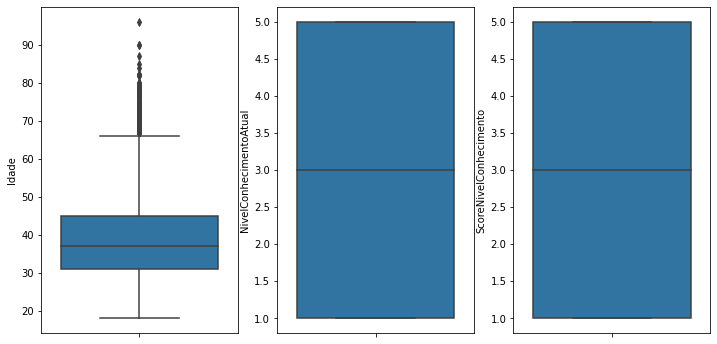

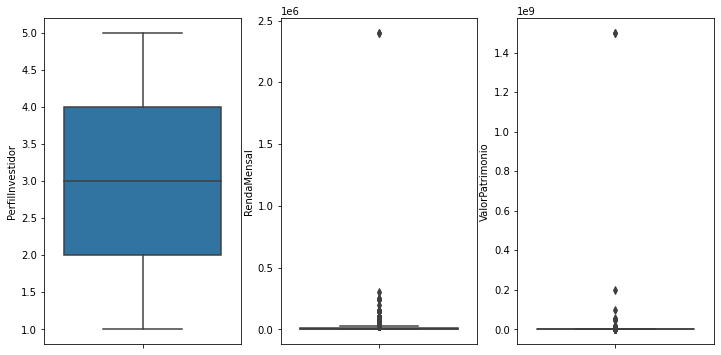

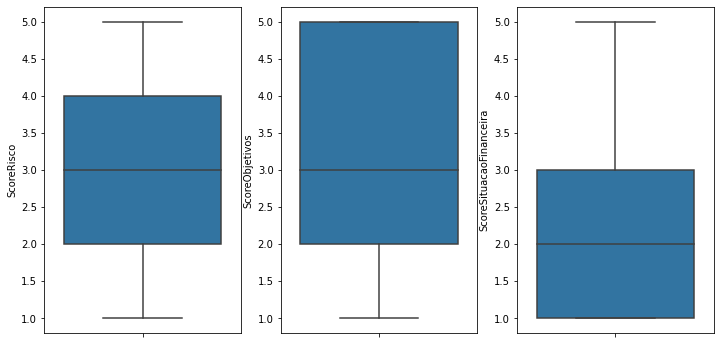

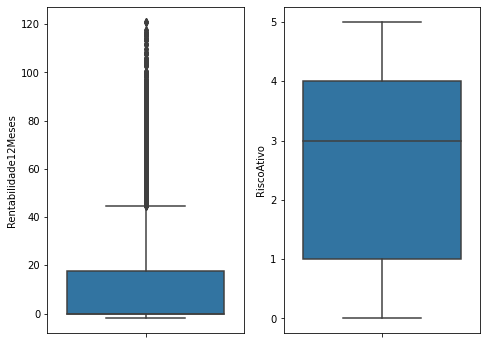

In [87]:
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
fig = sns.boxplot(x='Idade', data=df, orient='v')

plt.subplot(1,3,2)
fig = sns.boxplot(x='NivelConhecimentoAtual', data=df, orient='v')

plt.subplot(1,3,3)
fig = sns.boxplot(x='ScoreNivelConhecimento', data=df, orient='v')


plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
fig = sns.boxplot(x='PerfilInvestidor', data=df, orient='v')

plt.subplot(1,3,2)
fig = sns.boxplot(x='RendaMensal', data=df, orient='v')

plt.subplot(1,3,3)
fig = sns.boxplot(x='ValorPatrimonio', data=df, orient='v')

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
fig = sns.boxplot(x='ScoreRisco', data=df, orient='v')

plt.subplot(1,3,2)
fig = sns.boxplot(x='ScoreObjetivos', data=df, orient='v')

plt.subplot(1,3,3)
fig = sns.boxplot(x='ScoreSituacaoFinanceira', data=df, orient='v')


plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
fig = sns.boxplot(x='Rentabilidade12Meses', data=df, orient='v')

plt.subplot(1,3,2)
fig = sns.boxplot(x='RiscoAtivo', data=df, orient='v')


#sns.distplot(df['Idade'], bins=20, kde=False);
#sns.distplot(df['EstadoCivil'], bins=20);

<Figure size 864x432 with 0 Axes>

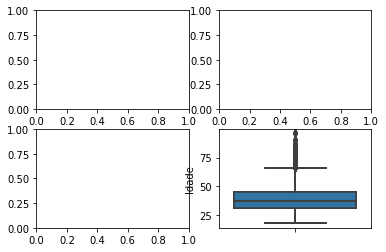

<Figure size 1080x360 with 0 Axes>

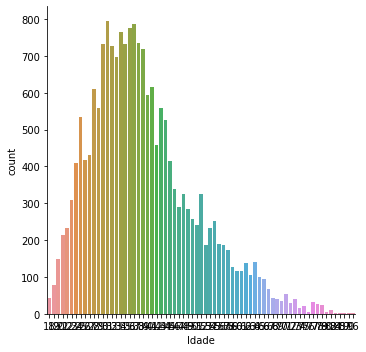

In [40]:
plt.figure(1 , figsize = (15 , 5))
sns.catplot('Idade', data=df, kind='count')
plt.show()

In [73]:
#Verificando se há linhas duplicadas.
print(df[df.duplicated()])


Empty DataFrame
Columns: [index, Id, Idade, EstadoCivil, BillingCity, NivelConhecimentoAtual, ScoreNivelConhecimento, PerfilInvestidor, RendaMensal, ValorPatrimonio, Pergunta1, Resposta11, Pergunta2, Resposta21, Pergunta3, Resposta31, Pergunta4, Resposta41, Pergunta5, Resposta51, Resposta52, Resposta53, Resposta54, Resposta55, Resposta56, Resposta57, Resposta58, Pergunta6, Resposta61, Resposta62, Resposta63, Resposta64, Resposta65, Resposta66, Resposta67, Resposta68, Pergunta7, Resposta71, Resposta72, Resposta73, Resposta74, Resposta75, Pergunta8, Resposta81, Pergunta9, Resposta91, ScoreRisco, ScoreObjetivos, ScoreSituacaoFinanceira, Produto, NomeDoProduto, NomeEmissor, TaxaCliente, TaxaPreCliente, DescricaoProduto, ValorMinimoAplicaInicial, ValorMinimoAplicacaoAdicional, DataVencimento, FamiliaCarteira, ValorInvestidoAtual, ValorRendimento, Rentabilidade12Meses, RentabilidadeMes, RiscoAtivo, Status, ProdutoId]
Index: []

[0 rows x 66 columns]


In [74]:
df.dtypes


index                     int64
Id                       object
Idade                     int64
EstadoCivil              object
BillingCity              object
                         ...   
Rentabilidade12Meses    float64
RentabilidadeMes         object
RiscoAtivo              float64
Status                   object
ProdutoId                object
Length: 66, dtype: object

In [75]:
df.head()

,index,Id,Idade,EstadoCivil,BillingCity,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,...,ValorMinimoAplicacaoAdicional,DataVencimento,FamiliaCarteira,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RentabilidadeMes,RiscoAtivo,Status,ProdutoId
0,0,$2b$10$.DCvvJ9WSDpqVP2xXjeSPe9yBilu2JVQh2nFTHN...,30,M,Aracruz,1.0,1.0,2,1300.0,6000.0,...,30.0,NaN,Renda Fixa,30.0,NaN,0.0,0.37005375,1.0,Efetivada,a0W6A000009GZdgUAG
1,1,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,150.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
2,2,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,50.0,NaN,0.0,0.05684974,1.0,Efetivada,a0W6A000009GZdgUAG
3,3,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,60.0,NaN,0.0,0.13178136,1.0,Efetivada,a0W6A000009GZdgUAG
4,4,$2b$10$.DCvvJ9WSDpqVP2xXjeSPeR6I3TrUCl/MAePvQQ...,25,S,Teresina,1.0,1.0,2,500.0,NaN,...,30.0,NaN,Renda Fixa,40.0,NaN,0.0,0.15076414,1.0,Efetivada,a0W6A000009GZdgUAG


In [76]:
df.describe()

,index,Idade,NivelConhecimentoAtual,ScoreNivelConhecimento,PerfilInvestidor,RendaMensal,ValorPatrimonio,ScoreRisco,ScoreObjetivos,ScoreSituacaoFinanceira,TaxaCliente,TaxaPreCliente,ValorMinimoAplicaInicial,ValorMinimoAplicacaoAdicional,ValorInvestidoAtual,ValorRendimento,Rentabilidade12Meses,RiscoAtivo
count,38102.000000,38102.000000,34956.000000,37577.000000,38102.000000,3.810200e+04,2.565000e+04,37577.000000,37577.000000,37577.000000,5614.000000,5615.000000,22746.000000,30929.000000,36483.000000,5421.000000,30861.000000,36476.000000
mean,19050.500000,37.230145,2.480804,2.533678,2.779959,8.368189e+03,9.122847e+05,2.671874,3.141815,2.124252,98.189526,0.413389,744.188094,360.480540,4046.749768,196.936554,9.666901,2.615309
std,10999.244315,11.365521,1.522709,1.538015,1.121397,2.754596e+04,1.498490e+07,1.109866,1.176798,1.012600,26.149983,1.776756,2344.743320,1032.730307,17034.380766,748.580640,18.926591,1.532361
min,0.000000,17.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99.693346,0.000000
25%,9525.250000,29.000000,1.000000,1.000000,2.000000,2.000000e+03,4.000000e+04,2.000000,2.000000,1.000000,94.000000,0.000000,30.000000,30.000000,40.000000,7.490000,0.000000,1.000000
50%,19050.500000,36.000000,2.000000,2.000000,3.000000,4.200000e+03,2.000000e+05,3.000000,3.000000,2.000000,101.000000,0.000000,30.000000,30.000000,300.000000,28.080000,0.000000,2.000000
75%,28575.750000,43.000000,4.000000,4.000000,4.000000,1.000000e+04,7.000000e+05,3.000000,4.000000,3.000000,113.000000,0.000000,500.000000,100.000000,2000.000000,103.750000,11.122177,4.000000
max,38101.000000,96.000000,5.000000,5.000000,5.000000,2.400000e+06,1.500000e+09,5.000000,5.000000,5.000000,140.000000,12.000000,50000.000000,30000.000000,800000.000000,16834.210000,584.324863,5.000000


In [ ]:
Idade
EstadoCivil
perfilInvestidor -- Perfil do investidor de 1 a 5, sendo 1 e 2 conservador, 3 e 4 moderado e 5 arrojado
ScoreRisco -- Score de risco do usuário de 1 a 5, do menor para o maior

FamiliaCarteira
ValorInvestidoAtual
ValorRendimento 
Rentabilidade12Meses
RentabilidadeMes
RiscoAtivo
Status
ProdutoId

In [1]:
df.groupby(['perfilInvestidor','EstadoCivil'])['Idade'].mean()

NameError: name 'df' is not defined

In [77]:
plt.style.use('fivethirtyeight')


In [63]:
df.EstadoCivil.unique()

array(['M', 'S', 'C', 'D', 'V', 'I'], dtype=object)

Text(0.5, 1.0, 'Distplot of Idade')

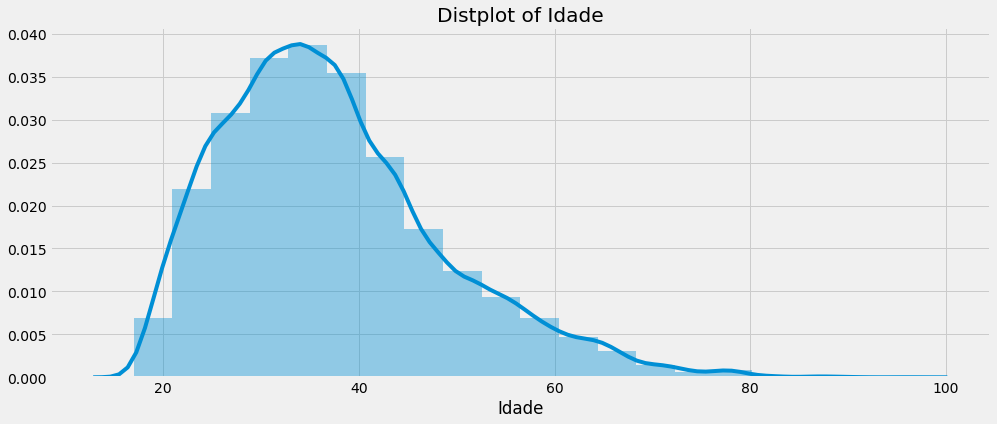

In [82]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
sns.distplot(df['Idade'] , bins = 20)
plt.title('Distplot of {}'.format(x))


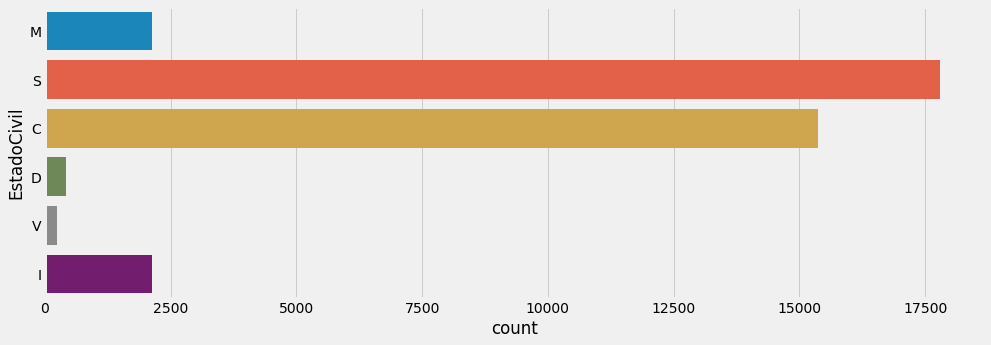

In [85]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'EstadoCivil' , data = df)
plt.show()

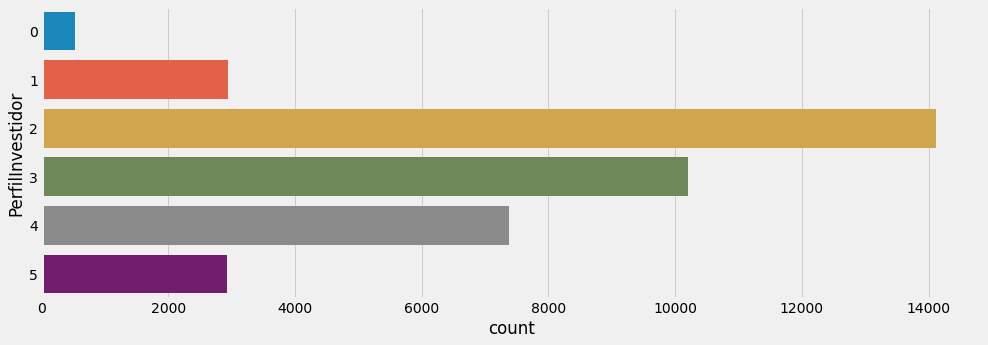

In [91]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'PerfilInvestidor' , data = df)
plt.show()

<Figure size 1080x360 with 0 Axes>

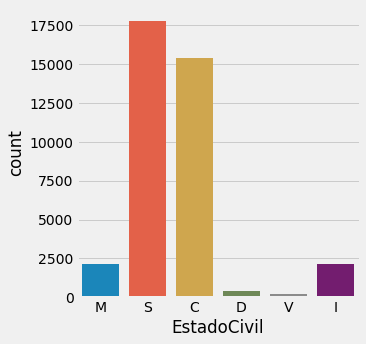

In [94]:
plt.figure(1 , figsize = (15 , 5))
sns.catplot('EstadoCivil', data=df, kind='count')
plt.show()

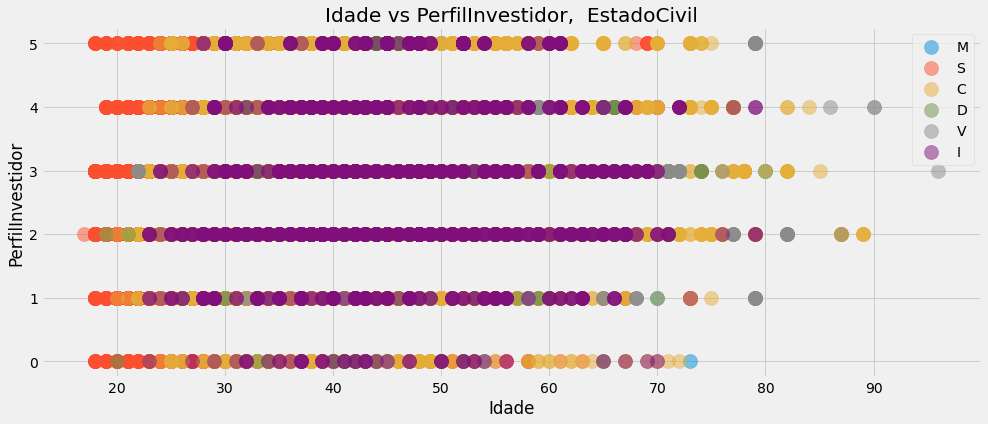

In [90]:
plt.figure(1 , figsize = (15 , 6))
for EstadoCivil in ['M' , 'S','C','D', 'V', 'I']:
    plt.scatter(x = 'Idade' , y = 'PerfilInvestidor' , data = df[df['EstadoCivil'] == EstadoCivil] ,
                s = 200 , alpha = 0.5 , label = EstadoCivil)
plt.xlabel('Idade'), plt.ylabel('PerfilInvestidor') 
plt.title('Idade vs PerfilInvestidor,  EstadoCivil')
plt.legend()
plt.show()

In [99]:
def plot_line_graph(x, hue):
    fig = sns.FacetGrid(df, hue=hue, aspect=4)
    fig.map(sns.kdeplot, x, shade=True)
    fig.set(xlim=(0, df[x].max()))
    fig.add_legend()
    return fig

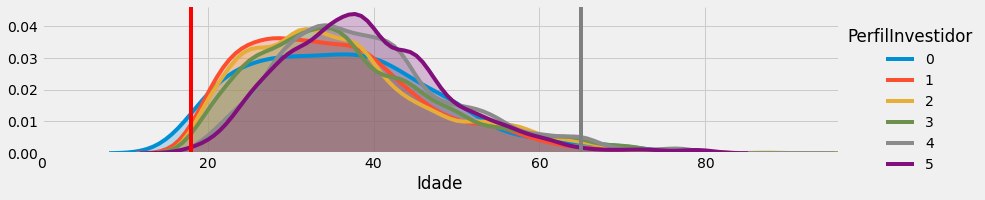

In [100]:
fig = plot_line_graph('Idade', 'PerfilInvestidor')
fig.ax.axvline(18, color='r')
fig.ax.axvline(65, color='gray')

<Figure size 1080x360 with 0 Axes>

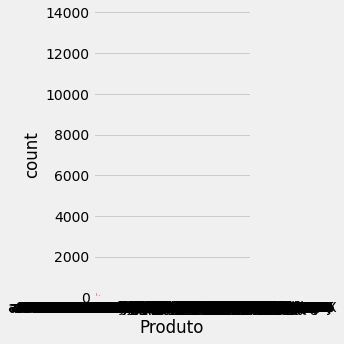

In [101]:


plt.figure(1 , figsize = (15 , 5))
sns.catplot('Produto', data=df, kind='count')
plt.show()

# Dataset de produtos

In [90]:
df_product = pd.read_csv("Dataset-3.csv", sep=',', index_col=0, parse_dates=True)
df_product.reset_index(inplace = True)

In [93]:
df_product.head()

,index,AdministradorFundo__c,AtivoDisponivel__c,Carencia__c,CarteiraCNPJ__c,CNPJAdministrador__c,DataDeVencimento__c,DescontoIR__c,DescricaoAtivo__c,DescricaoCarencia__c,...,TipoCarteira__c,TipoCota__c,TipoIndexador__c,TipoRegimeCondomonioCVM__c,Tributacao__c,ValorMinimoAplicacaoAdicional__c,ValorMinimoAplicaInicial__c,ValorMinimoResgate__c,ValorMinimo__c,Vencimento__c
0,0,NaN,False,2020-11-16,NaN,NaN,2020-11-16,20.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2020-11-16
1,1,NaN,False,2021-11-16,NaN,NaN,2021-11-16,17.5,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2021-11-16
2,2,NaN,False,2022-11-16,NaN,NaN,2022-11-16,15.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2022-11-16
3,3,NaN,False,2024-11-18,NaN,NaN,2024-11-18,15.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,...,NaN,NaN,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2024-11-18
4,4,NaN,False,2020-11-03,NaN,NaN,2020-11-03,20.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,...,NaN,NaN,Pré fixado,NaN,NaN,NaN,NaN,NaN,5000.0,2020-11-03


In [92]:
df_product.describe()

,index,DescontoIR__c,DiasVencimento__c,FiltroValorMinimo__c,LucroMesAnterior__c,NDiasCotizacaoAplicacao__c,NrDiasUteisCotizacaoResgate__c,NrDiasUteisLiqFAplicacao__c,NrDiasUteisLiqFResgate__c,PatrimonioLiquidoAtual__c,...,TaxaEmissao__c,TaxaNegociada360__c,TaxaPerformance__c,TaxaPreCliente__c,TaxaPreEmissao__c,Taxa__c,ValorMinimoAplicacaoAdicional__c,ValorMinimoAplicaInicial__c,ValorMinimoResgate__c,ValorMinimo__c
count,8603.000000,8603.000000,8282.000000,8603.000000,320.000000,320.000000,320.000000,320.0,320.000000,3.200000e+02,...,8282.000000,8282.0,0.0,8282.000000,8282.000000,8282.0,320.000000,320.000000,320.000000,8282.000000
mean,4301.000000,17.279437,858.665902,5781.588051,1.890720,0.390625,22.121875,0.0,1.540625,5.894390e+08,...,37.163605,0.0,NaN,5.104583,5.389063,0.0,2607.675000,6775.468750,2435.800000,5743.884569
std,2483.616516,2.606157,570.948565,11837.216847,18.521884,0.488655,17.729794,0.0,0.720223,1.209156e+09,...,49.820761,0.0,NaN,4.026771,11.667128,0.0,3616.864216,8598.930445,3155.308798,11944.003587
min,0.000000,15.000000,-1.000000,0.000000,-18.366811,0.000000,0.000000,0.0,0.000000,0.000000e+00,...,0.000000,0.0,NaN,0.000000,0.000000,0.0,0.000000,30.000000,0.000000,1.000000
25%,2150.500000,15.000000,361.000000,1000.000000,0.054150,0.000000,3.000000,0.0,1.000000,6.793882e+07,...,0.000000,0.0,NaN,3.150000,3.350000,0.0,500.000000,1000.000000,500.000000,1000.000000
50%,4301.000000,17.500000,719.000000,5000.000000,0.476561,0.000000,30.000000,0.0,1.000000,2.025237e+08,...,0.000000,0.0,NaN,5.700000,5.900000,0.0,1000.000000,5000.000000,1000.000000,5000.000000
75%,6451.500000,20.000000,1249.000000,10000.000000,1.345336,1.000000,30.000000,0.0,2.000000,6.523775e+08,...,100.000000,0.0,NaN,7.007500,7.197500,0.0,5000.000000,10000.000000,5000.000000,10000.000000
max,8602.000000,22.500000,17898.000000,1000000.000000,328.808151,1.000000,90.000000,0.0,5.000000,1.404355e+10,...,143.000000,0.0,NaN,114.000000,1000.000000,0.0,30000.000000,50000.000000,25000.000000,1000000.000000


In [94]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8603 entries, 0 to 8602
Data columns (total 86 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   index                                 8603 non-null   int64  
 1   AdministradorFundo__c                 320 non-null    object 
 2   AtivoDisponivel__c                    8603 non-null   bool   
 3   Carencia__c                           8282 non-null   object 
 4   CarteiraCNPJ__c                       320 non-null    object 
 5   CNPJAdministrador__c                  320 non-null    object 
 6   DataDeVencimento__c                   8282 non-null   object 
 7   DescontoIR__c                         8603 non-null   float64
 8   DescricaoAtivo__c                     8593 non-null   object 
 9   DescricaoCarencia__c                  8603 non-null   object 
 10  DescricaoClasse__c                    8282 non-null   object 
 11  DescricaoCotizaca

In [ ]:
df = df.iloc[:,[1,2,3,4,5,6,7,8,9,46,47,48,49,58,61,62,63,64,65]]


In [95]:
df_with_dummies = pd.get_dummies(df_product, prefix='AtivoDisponivel_', columns=['AtivoDisponivel__c'])


In [96]:
df_with_dummies.head()

,index,AdministradorFundo__c,Carencia__c,CarteiraCNPJ__c,CNPJAdministrador__c,DataDeVencimento__c,DescontoIR__c,DescricaoAtivo__c,DescricaoCarencia__c,DescricaoClasse__c,...,TipoIndexador__c,TipoRegimeCondomonioCVM__c,Tributacao__c,ValorMinimoAplicacaoAdicional__c,ValorMinimoAplicaInicial__c,ValorMinimoResgate__c,ValorMinimo__c,Vencimento__c,AtivoDisponivel__False,AtivoDisponivel__True
0,0,NaN,2020-11-16,NaN,NaN,2020-11-16,20.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,PRIVADO,...,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2020-11-16,1,0
1,1,NaN,2021-11-16,NaN,NaN,2021-11-16,17.5,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,PRIVADO,...,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2021-11-16,1,0
2,2,NaN,2022-11-16,NaN,NaN,2022-11-16,15.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,PRIVADO,...,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2022-11-16,1,0
3,3,NaN,2024-11-18,NaN,NaN,2024-11-18,15.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,PRIVADO,...,IPCA,NaN,NaN,NaN,NaN,NaN,5000.0,2024-11-18,1,0
4,4,NaN,2020-11-03,NaN,NaN,2020-11-03,20.0,"O Certificado de Dep�sito Banc�rio, de forma s...",No venc.,PRIVADO,...,Pré fixado,NaN,NaN,NaN,NaN,NaN,5000.0,2020-11-03,1,0


In [98]:
round(df_product.isna().mean()*100,2)


index                                0.00
AdministradorFundo__c               96.28
AtivoDisponivel__c                   0.00
Carencia__c                          3.73
CarteiraCNPJ__c                     96.28
                                    ...  
ValorMinimoAplicacaoAdicional__c    96.28
ValorMinimoAplicaInicial__c         96.28
ValorMinimoResgate__c               96.28
ValorMinimo__c                       3.73
Vencimento__c                        3.73
Length: 86, dtype: float64